Initial Data:
   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94

After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB
None

Descriptive Statistics:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    2

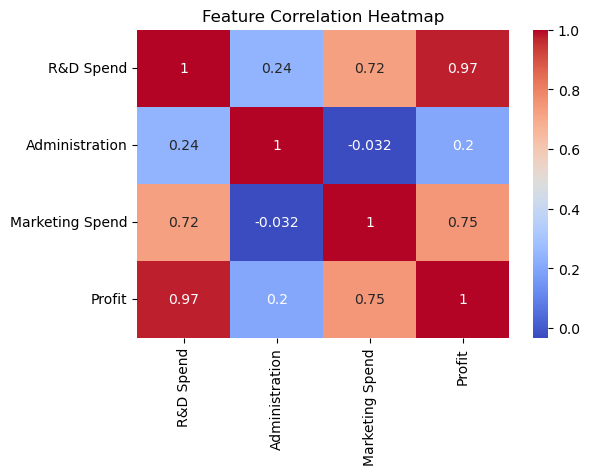


Model Summary:
Intercept: 50122.19298986524
Coefficients: {'R&D Spend': 0.8057150499157438, 'Administration': -0.026815968394750877, 'Marketing Spend': 0.027228064800818845}
R² Score: 0.9507459940683246
RMSE: 8855.344489015139


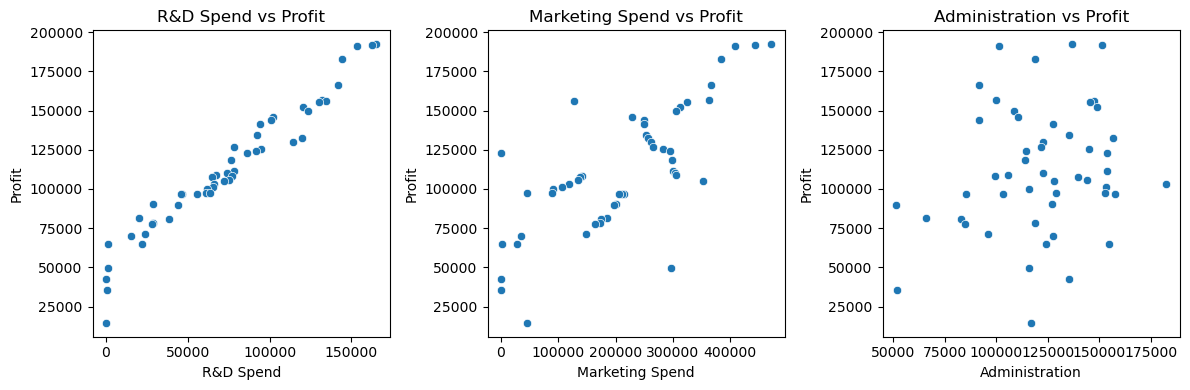


Predicted Profits:
   R&D Spend  Administration  Marketing Spend  Predicted Profit
0   21892.92        81910.77         164270.7      70037.904765
1   23940.93        96489.63         137001.1      70554.572560


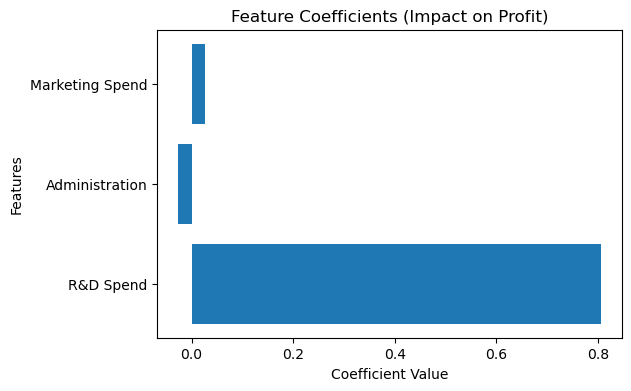


✅ Regression Analysis Completed Successfully!
Cleaned data saved as 'cleaned_dataset.csv'
EDA summary saved as 'EDA_summary.csv'
Predicted results saved as 'Predicted_Profit_Results.csv' & 'Predicted_Profit_Results.xlsx'


In [ ]:
# 📘 Regression_Model.ipynb
# Multiple Linear Regression for Profit Prediction

# ======================================================
# 1️⃣ Import Libraries
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

# ======================================================
# 2️⃣ Load Dataset
# ======================================================
# Replace with your dataset path
data = pd.read_csv("cleaned_dataset.csv")

# Display first few rows
print("Initial Data:")
print(data.head())

# ======================================================
# 3️⃣ Data Cleaning
# ======================================================
# Convert to numeric and drop invalid rows
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()
print("\nAfter Cleaning:")
print(data.info())

# Save cleaned dataset
data.to_csv("cleaned_dataset.csv", index=False)

# ======================================================
# 4️⃣ Exploratory Data Analysis (EDA)
# ======================================================
print("\nDescriptive Statistics:")
print(data.describe())

data.describe().to_csv("EDA_summary.csv")
data.corr().to_csv("correlation_matrix.csv")

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ======================================================
# 5️⃣ Define Features & Target
# ======================================================
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

# ======================================================
# 6️⃣ Train Regression Model
# ======================================================
model = LinearRegression()
model.fit(X, y)

# Model Parameters
intercept = model.intercept_
coefficients = dict(zip(X.columns, model.coef_))
r2 = model.score(X, y)
rmse = np.sqrt(mean_squared_error(y, model.predict(X)))

print("\nModel Summary:")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

# ======================================================
# 7️⃣ Visualize Relationships
# ======================================================
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.title("R&D Spend vs Profit")

plt.subplot(1,3,2)
sns.scatterplot(x='Marketing Spend', y='Profit', data=data)
plt.title("Marketing Spend vs Profit")

plt.subplot(1,3,3)
sns.scatterplot(x='Administration', y='Profit', data=data)
plt.title("Administration vs Profit")

plt.tight_layout()
plt.show()

# ======================================================
# 8️⃣ Predict New Profits
# ======================================================
test_data = pd.DataFrame({
    'R&D Spend': [21892.92, 23940.93],
    'Administration': [81910.77, 96489.63],
    'Marketing Spend': [164270.7, 137001.1]
})

test_data['Predicted Profit'] = model.predict(test_data)

print("\nPredicted Profits:")
print(test_data)

test_data.to_csv("Predicted_Profit_Results.csv", index=False)
test_data.to_excel("Predicted_Profit_Results.xlsx", index=False)

# ======================================================
# 9️⃣ Coefficients Bar Chart
# ======================================================
plt.figure(figsize=(6,4))
plt.barh(list(coefficients.keys()), list(coefficients.values()))
plt.title("Feature Coefficients (Impact on Profit)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

# ======================================================
# 🔟 Save Outputs Summary
# ======================================================
print("\n✅ Regression Analysis Completed Successfully!")
print(f"Cleaned data saved as 'cleaned_dataset.csv'")
print(f"EDA summary saved as 'EDA_summary.csv'")
print(f"Predicted results saved as 'Predicted_Profit_Results.csv' & 'Predicted_Profit_Results.xlsx'")